# Graphical Data Analysis

When you get a set of measurements, ask yourself:
- What do you want to learn from this data?
- What is your hypothesis, and what would it look like if the data supports or does not support your hypothesis?
- **Plot your data!** (and always label your plots clearly) (Helsel, 2020 (Ch 2))

## Reporting of Numbers

- Keep track of **units**, and always report units with your numbers!
  - Make sure to check metadata about how the measurements were made
- Significant figures
  - From our snow depth example last week:
    - Should I report a snow depth value of 20.3521 cm?
    - Should I report a snow depth value of 2035 mm?
    - Should I report a snow depth value of 20.0000 cm?
  - Consider the certainty with which you know a value. Don't include any more precision beyond that
  - Note: Rounding errors - Allow the computer to include full precision for intermediate calculations, round to significant figures for the final result of the computation that you report in the answer
  
---

To start, we will import some python packages:

In [1]:
# numpy has a lot of math and statistics functions we'll need to use
import numpy as np

 # pandas gives us a way to work with and plot tabular datasets easily (called "dataframes")
import pandas as pd

# we'll use matplotlib for plotting here (it works behind the scenes in pandas)
import matplotlib.pyplot as plt 

# tell jupyter to make out plots "inline" in the notbeook
%matplotlib inline 

### Why are you plotting?

**You have an applicaiton in mind with your data.** This application should inform your choice of analysis technique, what you want to plot and visualize.

Open our file using the pandas [read_csv function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [2]:
# Use pandas.read_csv() function to open this file.
# This stores the data in a "Data Frame"
my_data = pd.read_csv('my_data.csv')

In [3]:
# look at the first few rows of data with the .head() method
my_data.head()

,time,tair_max,tair_min,cumulative_precip
0,1920-12-31,16.945978,-13.393415,104.021210
1,1921-12-31,19.113444,-4.223308,139.135529
2,1922-12-31,14.643532,-9.717454,98.435399
3,1923-12-31,22.248071,-6.623368,176.352987
4,1924-12-31,15.787595,-28.050734,82.485079


### Scatterplots

- If we're looking for relationships btween variables within our data, try making [scatterplots](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html). 
- Later this quarter we'll get into statistical tests for correllation where we'll use scatterplots to visualize our data. 
- **Remember that correlation =/= causation!**

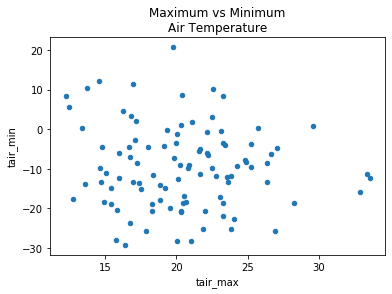

In [4]:
my_data.plot.scatter(x='tair_max', y='tair_min')
plt.title('Maximum vs Minimum\nAir Temperature');

### Timeseries plots

- If we are interested in how some random variable changes over time.
- Similarly, if we have a spatial dimension and are interested in how a variable change along some length we could make a spatial plot.

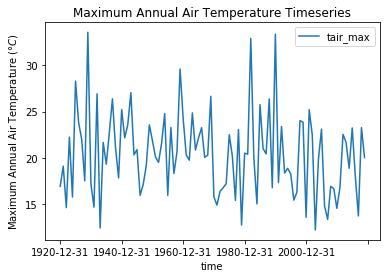

In [5]:
my_data.plot(x='time', y='tair_max')
plt.ylabel('Maximum Annual Air Temperature ($\degree C$)')
plt.title('Maximum Annual Air Temperature Timeseries');

### Histogram plots

- We are probably interested in what kind of distribution our data has.
- Make a histogram plot to quickly inspect (Note: Careful with the choice of [number or width of bins](https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width))
- See documantation for making [histograms with pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html#pandas.Series.plot.hist), and [histograms with matplotlib](https://matplotlib.org/3.1.3/gallery/statistics/hist.html)

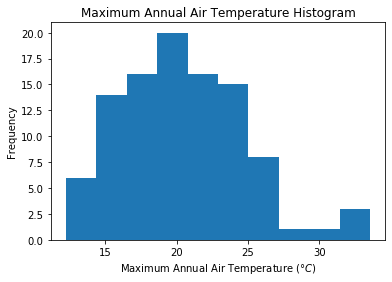

In [6]:
my_data['tair_max'].plot.hist(bins=10)
plt.xlabel('Maximum Annual Air Temperature ($\degree C$)')
plt.title('Maximum Annual Air Temperature Histogram');

### Boxplots

- A [boxplot](https://en.wikipedia.org/wiki/Box_plot) (sometimes called "box-and-whisker" plots) can also help visualize a distribution, especially when we want to compare multiple data sets side by side.
- The box usually represents the interquartile range (IQR) (between the 25th and 75th percentiles)
- Symbols (lines, circles, etc) within the box can represent the sample mean and/or median
- Vertical line "whiskers" can represent the full range (minimum to maximum) or another percentile range (such as 2nd and 98th percentiles)
- Data points beyond the "whiskers" are "outliers"
- What each symbol represents can vary, so be sure to check documentation to be sure! See documentation for making [boxplots with pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html), and [boxplots with batplotlib](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.boxplot.html).

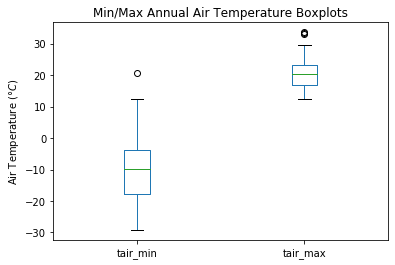

In [7]:
my_data.boxplot(column=['tair_min','tair_max'], grid=False)
plt.ylabel('Air Temperature ($\degree C$)')
plt.title('Min/Max Annual Air Temperature Boxplots');

---

## Let's look at a different set of data:

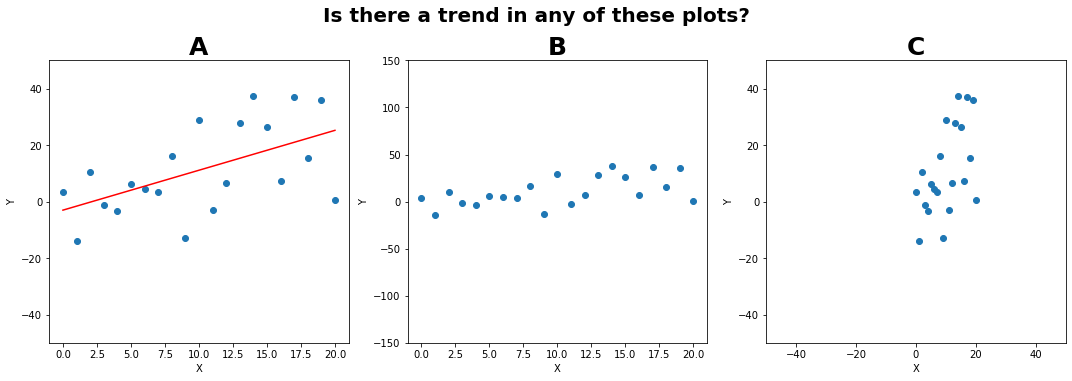

In [8]:
from scipy.stats import linregress

# Plot the same set of points three different ways to show how plots can be manipulated to trick us!
fig, [plotA, plotB, plotC] = plt.subplots(ncols=3, nrows=1, figsize=(15,5), tight_layout=True)

# The underlying data is a linear relationship, but with a lot of random noise added
# There is a trend in the data, but it is hard to detect
x = np.linspace(0,20,21)
y = x + 15*np.random.randn(21)

# Be careful! Depending only on the axes limits we choose, we can make the data look very different
plotA.scatter(x,y)
# Adding a regression line can sometimes be misleading (suggesting there's a trend even if there isn't)
m, b, _, _, _ = linregress(x, y)
# Just because I've plotted a linear regression here, doesn't mean that it's statistically significant!
plotA.plot(x, m*x + b, color='red')
plotA.set_xlim((-1,21)); plotA.set_ylim((-50,50))
plotA.set_xlabel('X'); plotA.set_ylabel('Y')
plotA.set_title('A', fontsize=25, fontweight='bold')

# We can make the data look a lot different by just changing the axes limites
# This can be misleading, be careful!
plotB.scatter(x,y)
plotB.set_xlim((-1,21)); plotB.set_ylim((-150,150))
plotB.set_xlabel('X'); plotB.set_ylabel('Y')
plotB.set_title('B', fontsize=25, fontweight='bold')

# We can make the data look a lot different by just changing the axes limites
# This can be misleading, be careful!
plotC.scatter(x,y)
plotC.set_xlim((-50,50)); plotC.set_ylim((-50,50))
plotC.set_xlabel('X'); plotC.set_ylabel('Y')
plotC.set_title('C', fontsize=25, fontweight='bold')

fig.suptitle('Is there a trend in any of these plots?', fontsize=20, fontweight='bold', y=1.05);

## Ethics in graphical analysis

**Be careful!**
- Others could try and manipulate plots and statistics to convince us of something
- We can end up tricking outselves with "wishful thinking" and "confirmation bias" if we are not careful
- This is why we have statistical tests, they're our attempt to find objective measures of "is this a true trend"
- **Don't draw a trendline through data when there isn't a statisticaly significant trend!**